In [1]:
import pandas as pd
import numpy as np

In [2]:
article = pd.read_csv("articles.csv")
customer = pd.read_csv("customers.csv")
sample_submission = pd.read_csv("sample_submission.csv")
transaction_train = pd.read_csv("transactions_train.csv")

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

# Article

In [5]:
# pd.options.display.max_columns = None
article.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
product_group_name_sorted = article.groupby(['product_group_name']).count()['article_id'].sort_values(ascending=False)
product_group_name_sorted

product_group_name
Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear                  3127
Socks & Tights            2442
Nightwear                 1899
Unknown                    121
Underwear/nightwear         54
Cosmetic                    49
Bags                        25
Items                       17
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Interior textile             3
Fun                          2
Name: article_id, dtype: int64

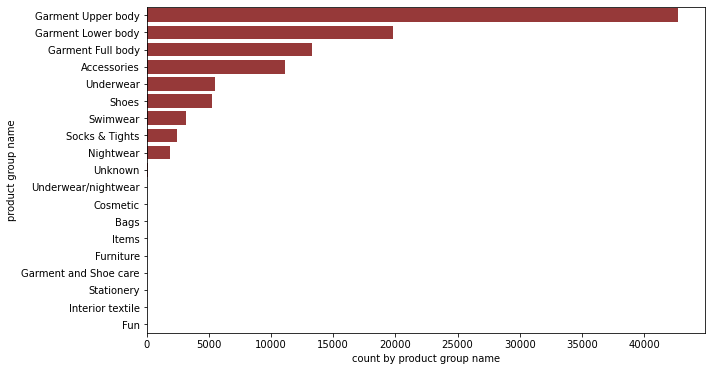

In [11]:
figure, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=product_group_name_sorted.values, y=product_group_name_sorted.index, color='brown')
ax.set_xlabel('count by product group name')
ax.set_ylabel('product group name')
plt.show()

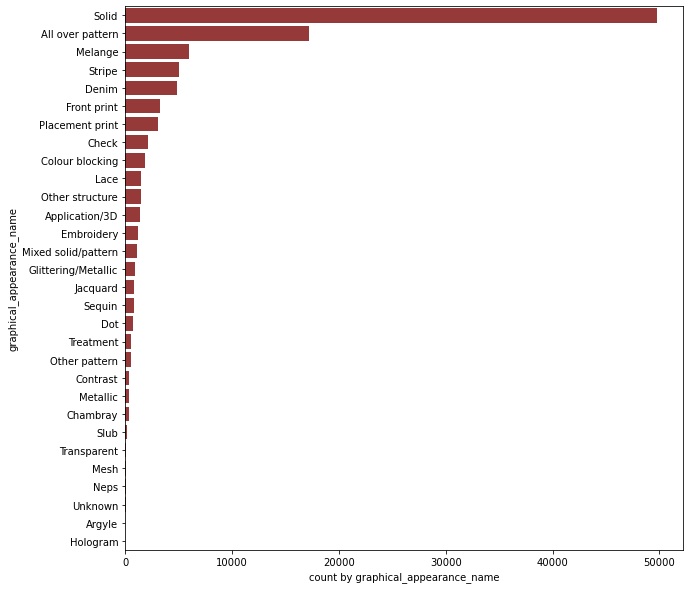

In [13]:
graphical_appearance_name_sorted = article.groupby('graphical_appearance_name').count()['article_id'].sort_values(ascending=False)
figure, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x=graphical_appearance_name_sorted.values, y=graphical_appearance_name_sorted.index, color='brown')
ax.set_xlabel('count by graphical_appearance_name')
ax.set_ylabel('graphical_appearance_name')
plt.show()

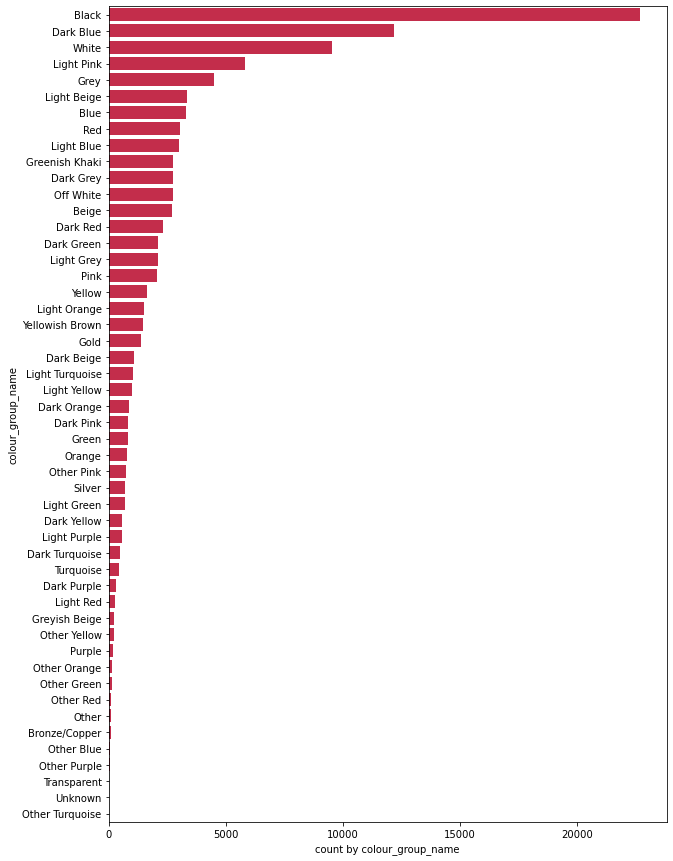

In [15]:
colour_group_name_sorted = article.groupby(['colour_group_name']).count()['article_id'].sort_values(ascending=False)
figure, ax = plt.subplots(figsize=(10, 15))
ax = sns.barplot(x=colour_group_name_sorted.values, y=colour_group_name_sorted.index, color='crimson')
ax.set_xlabel('count by colour_group_name')
ax.set_ylabel('colour_group_name')
plt.show()

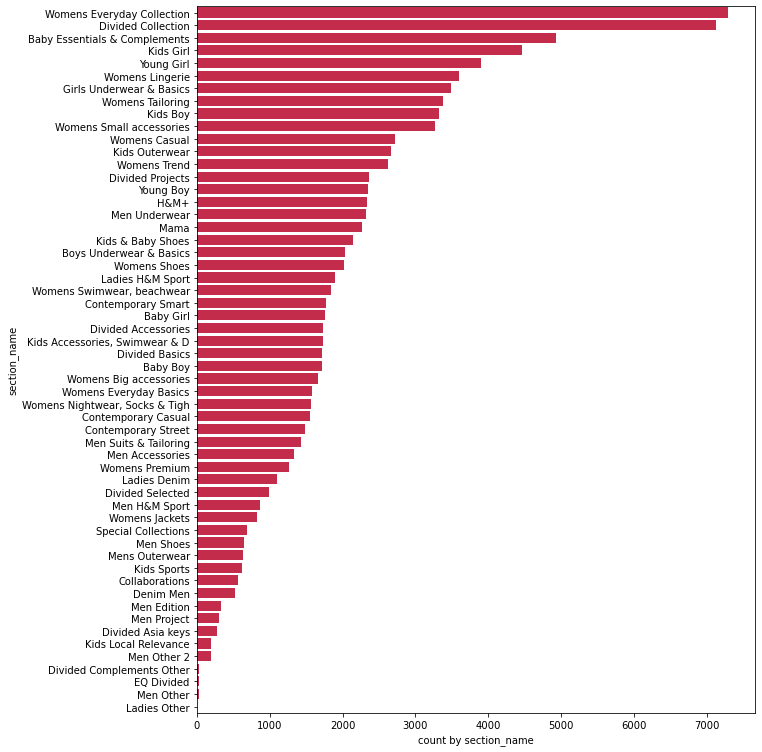

In [20]:
section_name_sorted = article.groupby(['section_name']).count()['article_id'].sort_values(ascending=False)
figure, ax = plt.subplots(figsize=(10, 13))
ax = sns.barplot(x=section_name_sorted.values, y=section_name_sorted.index, color='crimson')
ax.set_xlabel('count by section_name')
ax.set_ylabel('section_name')
plt.show()

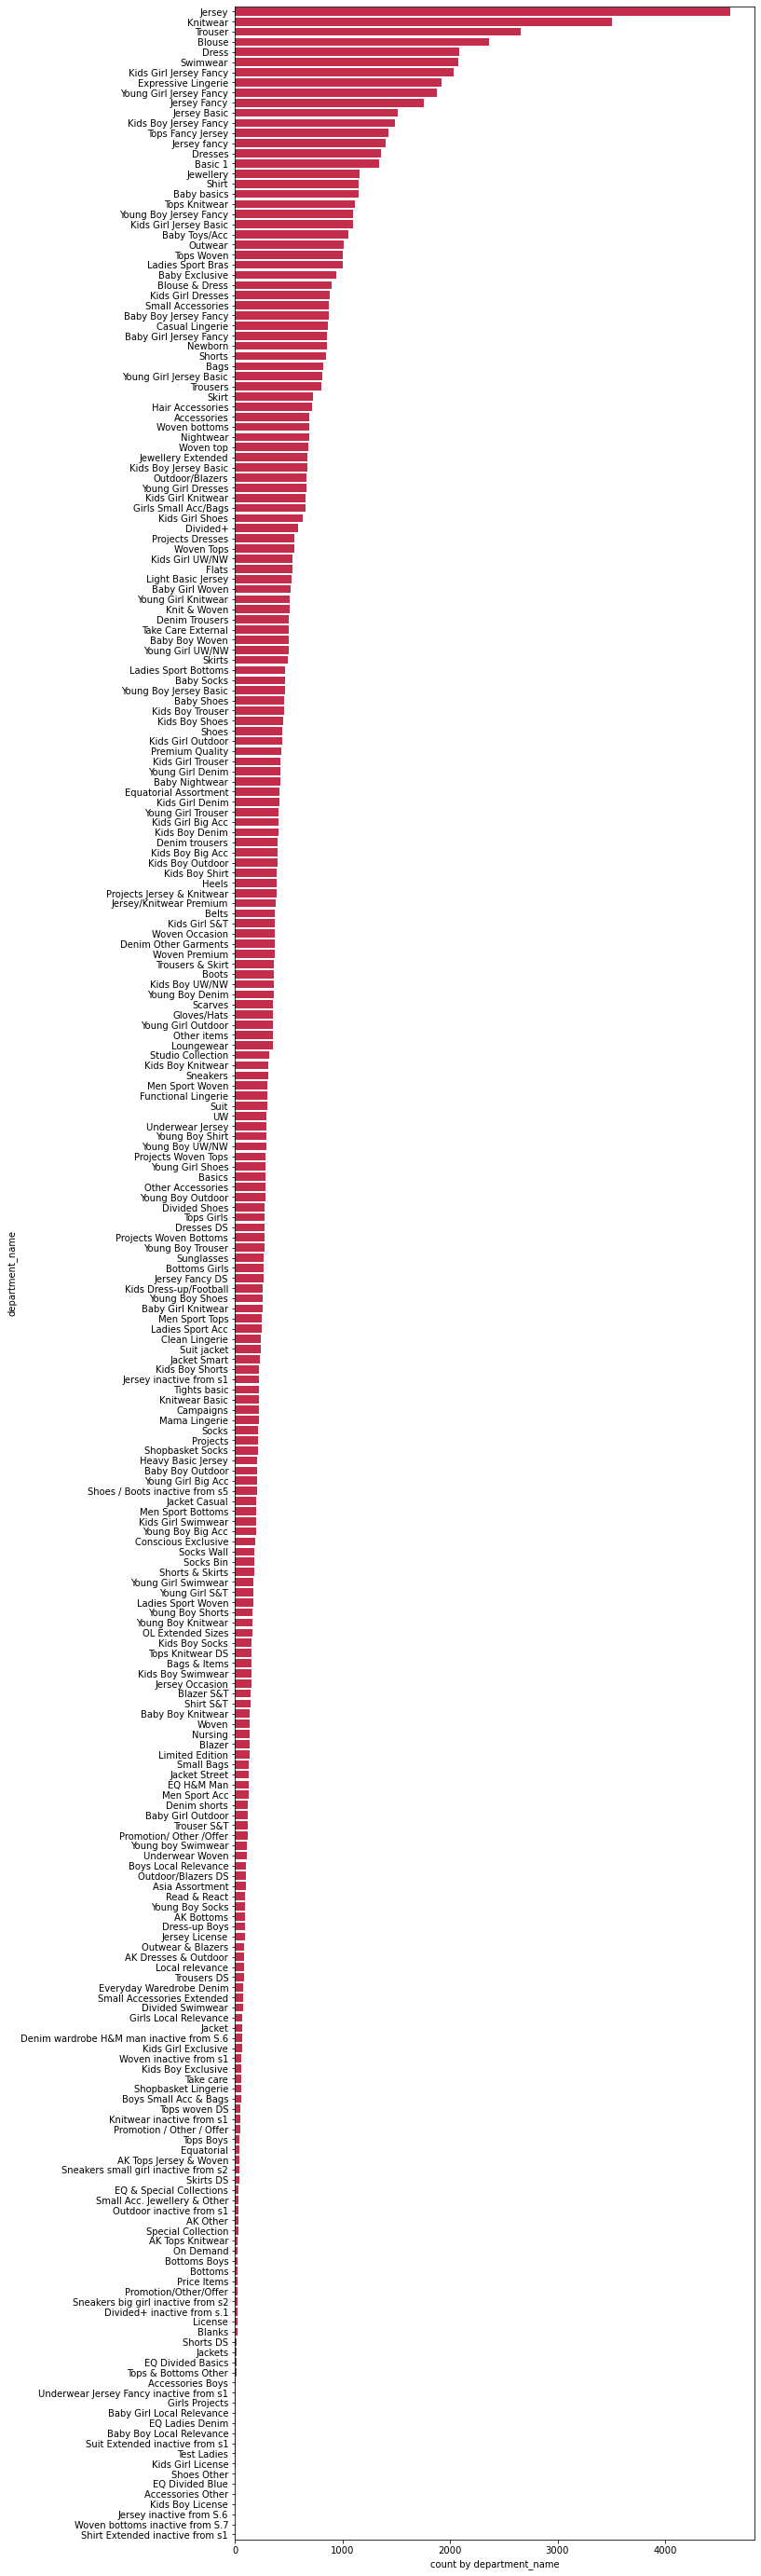

In [22]:
department_name_sorted = article.groupby(['department_name']).count()['article_id'].sort_values(ascending=False)
figure, ax = plt.subplots(figsize=(10, 50))
ax = sns.barplot(x=department_name_sorted.values, y=department_name_sorted.index, color='crimson')
ax.set_xlabel('count by department_name')
ax.set_ylabel('department_name')
plt.show()

In [25]:
article.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [73]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
#         stopwords=stopwords,
#         max_words=200,
        max_font_size=40, 
        collocations=False
#         scale=3,
#         random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [74]:
text = ' '.join(article['colour_group_name'])

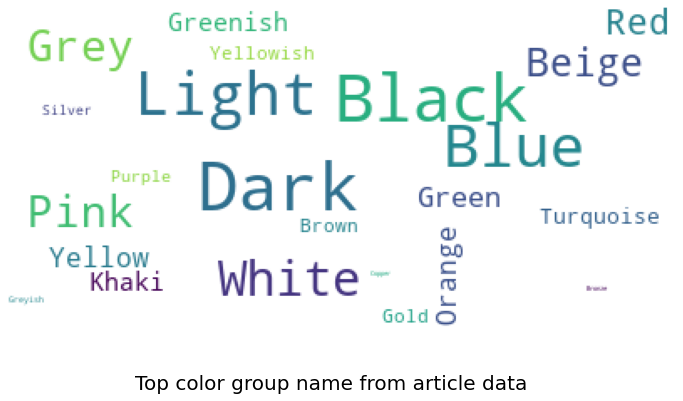

In [75]:
show_wordcloud(text, "Top color group name from article data")

In [68]:
text = ' '.join(article['department_name'])

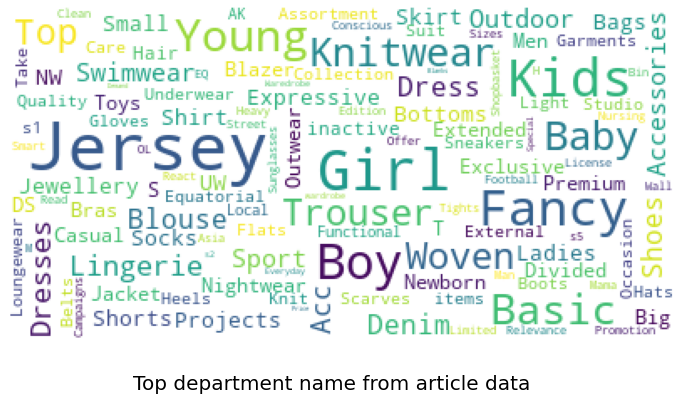

In [69]:
show_wordcloud(text, "Top department name from article data")

In [31]:
text = ' '.join(article['graphical_appearance_name'])

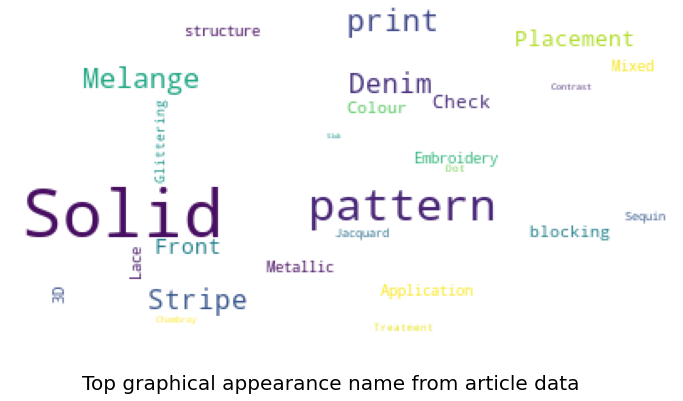

In [32]:
show_wordcloud(text, "Top graphical appearance name from article data")

# Customer

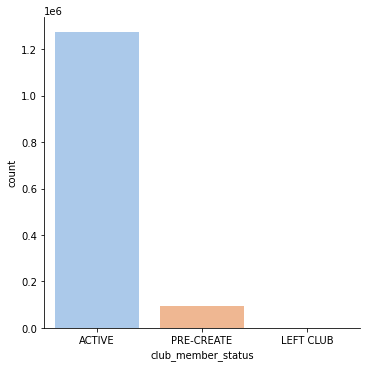

In [45]:
sns.catplot(data=customer, x='club_member_status', kind = 'count', palette = 'pastel')

<AxesSubplot:xlabel='age', ylabel='Count'>

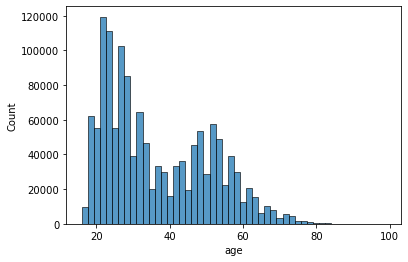

In [76]:
sns.histplot(data=customer, x='age', bins = 50, color = 'crimson')

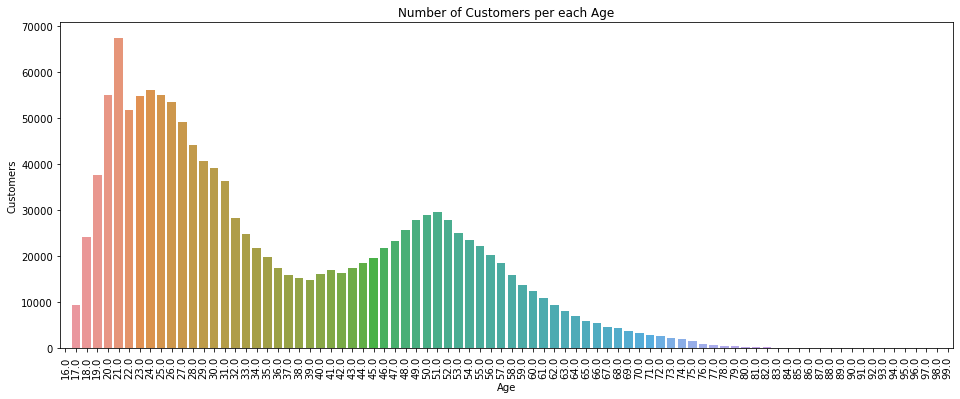

In [56]:
temp = customer.groupby(["age"])["customer_id"].count()
df = pd.DataFrame({'Age': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Age'], ascending=False)
plt.figure(figsize = (16,6))
plt.title(f'Number of Customers per each Age')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Age', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

# Transactions

In [51]:
transaction_train.nunique()

t_dat                   734
customer_id         1362281
article_id           104547
price                  9857
sales_channel_id          2
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

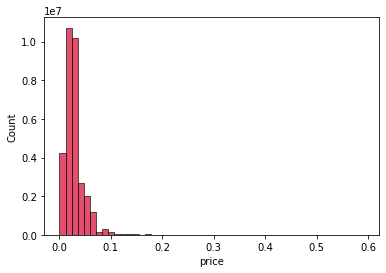

In [53]:
sns.histplot(data=transaction_train, x='price', bins = 50, color = 'crimson')

In [55]:
transactions_article = pd.merge(left=transaction_train, right=article, how='left',on='article_id')

In [57]:
text = ' '.join(transactions_article['department_name'])

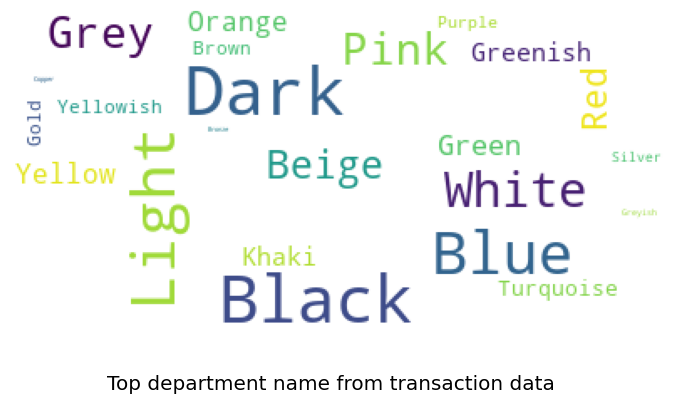

In [83]:
show_wordcloud(text, "Top department name from transaction data")

In [64]:
t_per_day = transaction_train.groupby('t_dat',as_index=False).count()

AttributeError: 'str' object has no attribute 'date'

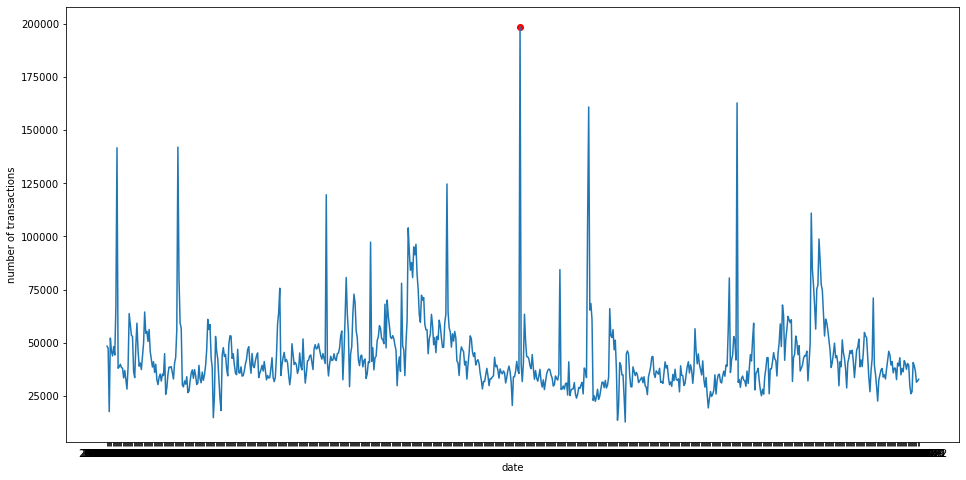

In [82]:
fig, ax = plt.subplots(figsize=(16,8))

sns.lineplot(data=t_per_day, x='t_dat',y='customer_id')

ax.set_xlabel('date')
ax.set_ylabel('number of transactions')

max_t = t_per_day['customer_id'].max()
max_t_date = t_per_day[t_per_day['customer_id']==max_t]['t_dat']
ax.scatter(max_t_date, max_t, c='red')
ax.text(max_t_date+pd.DateOffset(days=5), max_t-4000, '{}\n{:,d}'.format(max_t_date.iloc[0].date(), max_t))

min_t = t_per_day['customer_id'].min()
min_t_date = t_per_day[t_per_day['customer_id']==min_t]['t_dat']
ax.scatter(min_t_date, min_t, c='red')
ax.text(min_t_date+pd.DateOffset(days=5), min_t-4000, '{}\n{:,d}'.format(min_t_date.iloc[0].date(), min_t))
ax.set_xlim(t_per_day['t_dat'].min(),t_per_day['t_dat'].max())

for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')

plt.show()